# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df_ = pd.read_csv("archive/shooting.csv")

# Showing Data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,-,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,-,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,-,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,"According to the LA Times, ""Two law enforcemen...",-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,-,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022
5,LGBTQ club shooting,"Colorado Springs, Colorado",11-19-22,"Anderson L. Aldrich, 22, wore body armor and o...",5,25,30,Other,22,yes,Aldrich reportedly had a history of menacing b...,-,-,semiautomatic rifle; semiautomatic handgun,-,White,M,-,-,Mass,2022
6,University of Virginia shooting,"Charlottesville, Virginia",11-13-22,"Christopher Darnell Jones Jr., 22, allegedly o...",3,2,5,School,22,-,-,yes,"Dance's Sporting Goods; Colonial Heights, VA",semiautomatic pistol,Glock 45 9mm; Ruger AR-556 rifle (in his dorm ...,Black,M,-,-,Mass,2022
7,Raleigh spree shooting,"Hedingham, North Carolina",10-13-22,"Austin Thompson, 15, went on a rampage in the ...",5,2,7,Other,15,-,-,-,-,"shotgun, semiautomatic handgun",NaN,White,M,-,-,Spree,2022
8,Greenwood Park Mall shooting,"Greenwood, Indiana",7-17-22,"Jonathan Sapirman, 20, opened fire in a mall f...",3,2,5,workplace,20,-,-,yes,in Greenwood,semiautomatic rifles; semiautomatic handgun,Sig Sauer M400 rifle,White,M,-,-,Mass,2022
9,Highland Park July 4 parade shooting,"Highland Park, Illinois",7-4-22,"Suspected gunman Robert ""Bobby"" Crimo, 21, all...",7,46,53,Other,21,-,-,yes,"legally purchased by the shooter in the ""great...",semiautomatic rifle,"AR-15 style rifle, possibly modified for rapid...",White,M,-,-,Mass,2022


# 1. Basic Data Overview

In [5]:
df_.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year'],
      dtype='object')

Based on our interest of analysing the data, following columns are irrelevant so it will be discarded: 
Case, Date, Summary, Where_Obtained, Weapon_details, Mental Health Detail.

In [6]:
df_ = df_.drop(columns=['case', 'date', 'summary','where_obtained','weapon_details', 'mental_health_details'], axis=1)

In [7]:
print(df_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   location                          141 non-null    object
 1   fatalities                        141 non-null    int64 
 2   injured                           141 non-null    object
 3   total_victims                     141 non-null    object
 4   location.1                        141 non-null    object
 5   age_of_shooter                    141 non-null    object
 6   prior_signs_mental_health_issues  141 non-null    object
 7   weapons_obtained_legally          141 non-null    object
 8   weapon_type                       141 non-null    object
 9   race                              141 non-null    object
 10  gender                            141 non-null    object
 11  latitude                          141 non-null    object
 12  longitude             

In [8]:
df_.describe()

,fatalities,year
count,141.000000,141.000000
mean,7.808511,2010.382979
std,7.463162,10.796600
min,3.000000,1982.000000
25%,4.000000,2005.000000
50%,6.000000,2014.000000
75%,8.000000,2018.000000
max,58.000000,2023.000000


In [9]:
print("Shape: ",df_.shape)

Shape:  (141, 15)


In [10]:
df_.isna().sum()

location                            0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
weapons_obtained_legally            0
weapon_type                         0
race                                0
gender                              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64

Here, missing values in data is apparently 0 but actually the missing data is represented by "-" due to which it is not considered missing here. So we are required to find the actual missing values

In [11]:
cols = df_.columns.tolist()

In [12]:
#Function to deal with missing values represented as hyphen
missing_val_by_col = []
for col in cols:
    missing_val = 0
    for item in df_[col]:
        if item == '-':
            missing_val = missing_val+1
    missing_val_by_col.append(missing_val)

We obtained actual number of missing values by columns. 

In [13]:
print(cols)
missing_val_by_col

['location', 'fatalities', 'injured', 'total_victims', 'location.1', 'age_of_shooter', 'prior_signs_mental_health_issues', 'weapons_obtained_legally', 'weapon_type', 'race', 'gender', 'latitude', 'longitude', 'type', 'year']


[0, 0, 0, 0, 0, 2, 28, 17, 0, 13, 0, 15, 15, 0, 0]

# 2. Data Cleaning

In [14]:
df_['age_of_shooter'][df_["age_of_shooter"] == '-'] = 0

In [15]:
df_['age_of_shooter'].isna().sum()

0

Missing values of "age_of_shooter" column is substituted.

In [16]:
df_['prior_signs_mental_health_issues'][df_["prior_signs_mental_health_issues"] == '-'] = "Unknown"

In [17]:
df_['prior_signs_mental_health_issues'][df_["prior_signs_mental_health_issues"] == 'Unclear '] = "Unclear"
df_['prior_signs_mental_health_issues'][df_["prior_signs_mental_health_issues"] == 'yes'] = "Yes"

In [18]:
df_['prior_signs_mental_health_issues'].unique()

array(['Unknown', 'Yes', 'TBD', 'Unclear', 'No'], dtype=object)

The data of the columm was made uniform.

In [19]:
df_['weapons_obtained_legally'].unique()

array(['-', 'yes', 'Yes', 'No', 'TBD',
       'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI',
       'Unknown', '\nYes',
       'Yes ("some of the weapons were purchased legally and some of them may not have been")',
       'Yes '], dtype=object)

In [20]:
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == '-'] = "Unknown"

In [21]:
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == 'yes'] = "Yes"
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == 'Yes '] = "Yes"
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == '\nYes'] = "Yes"
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == 'Yes ("some of the weapons were purchased legally and some of them may not have been")'] = "Yes"

In [22]:
df_['weapons_obtained_legally'][df_["weapons_obtained_legally"] == 'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI'] = "No"

The data of the column was made uniform

In [23]:
df_['race'][df_["race"] == 'black'] = "Black"
df_['race'][df_["race"] == '-'] = "unclear"
df_['race'][df_["race"] == 'White '] = "White"
df_['race'][df_["race"] == 'white'] = "White"

In [24]:
df_['location.1'][df_["location.1"] == 'Other\n'] = "Other"
df_['location.1'][df_["location.1"] == '\nWorkplace'] = "workplace"
df_['location.1'][df_["location.1"] == 'Workplace'] = "workplace"
df_['location.1'][df_["location.1"] == 'Religious'] = "religious"

The data of column was made uniform

## Feature engineering

In [25]:
state = []
for item in df_.iloc[:,0]:
    k = item.split(",")
    state.append(k[1])

In [26]:
df_["state"] = state

Made a state column for better understanding of the violence. 

In [27]:
df_ = df_.drop(["location", "longitude", "latitude"], axis=1)

As we have state column, the irrelevant column were dropped.

In [28]:
df_['gender'][df_["gender"] == 'M'] = "Male"
df_['gender'][df_["gender"] == "F"] = "Female"

# 3. Data Visulization Univariate

In [29]:
df_["age_of_shooter"]= pd.to_numeric(df_["age_of_shooter"])

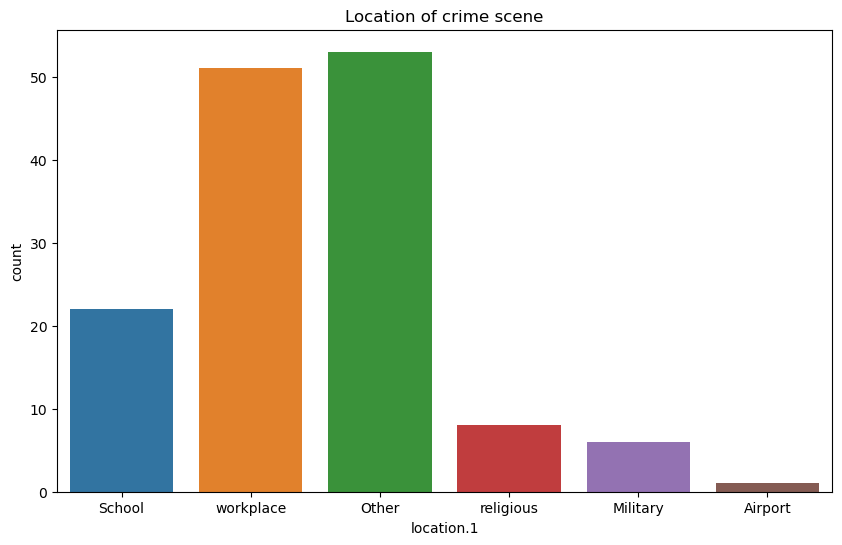

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_, x="location.1")
plt.title("Location of crime scene")
plt.show()

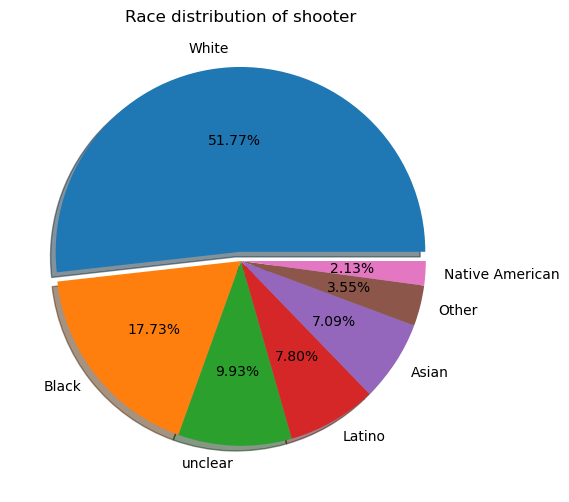

In [31]:
plt.figure(figsize=(8, 6))
mylabel =df_["race"].value_counts().index.tolist()
explode=[0.05,0,0,0,0,0,0]
plt.pie(df_["race"].value_counts(), autopct="%.2f%%", labels=mylabel, explode=explode, shadow=True)
plt.title("Race distribution of shooter")
plt.show()

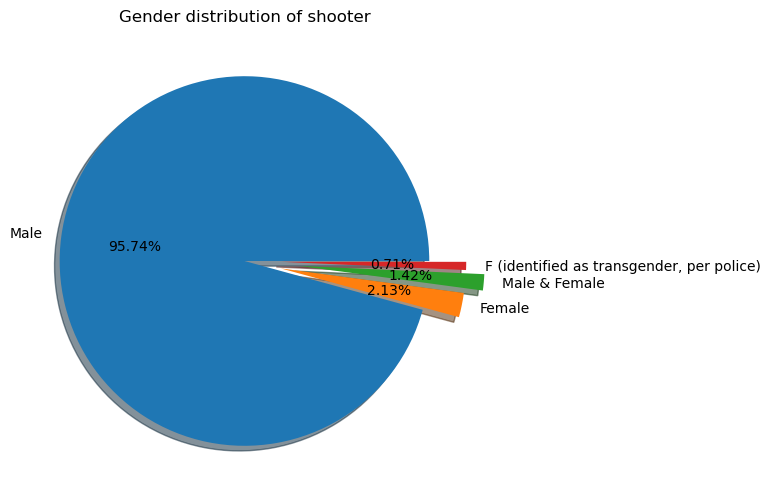

In [32]:
plt.figure(figsize=(8, 6))
mylabel =df_["gender"].value_counts().index.tolist()
explode = [0,0.2,0.3,0.2]
plt.pie(df_["gender"].value_counts(), autopct="%.2f%%", labels=mylabel, shadow=True, explode=explode)
plt.title("Gender distribution of shooter")
plt.show()

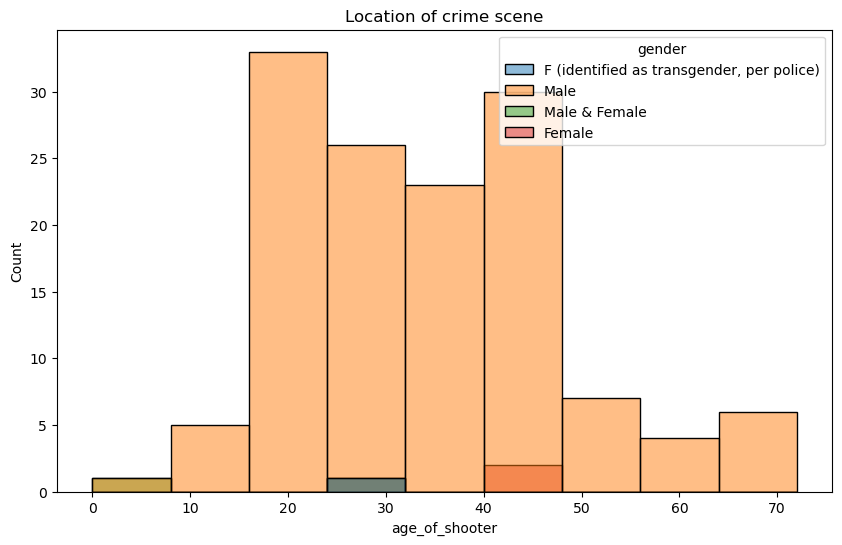

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_, x="age_of_shooter", hue="gender", common_bins=True)
plt.title("Location of crime scene")
plt.show()

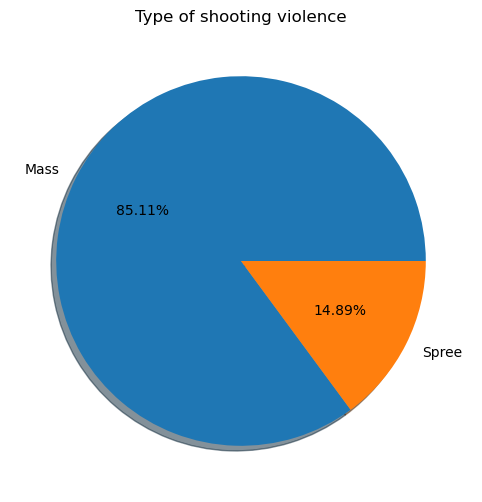

In [34]:
plt.figure(figsize=(8, 6))
mylabel = ["Mass", "Spree"]
plt.pie(df_["type"].value_counts(), autopct="%.2f%%", labels=mylabel,shadow=True)
plt.title("Type of shooting violence")
plt.show()

In [35]:
year_df = df_["year"].value_counts().to_frame().reset_index()

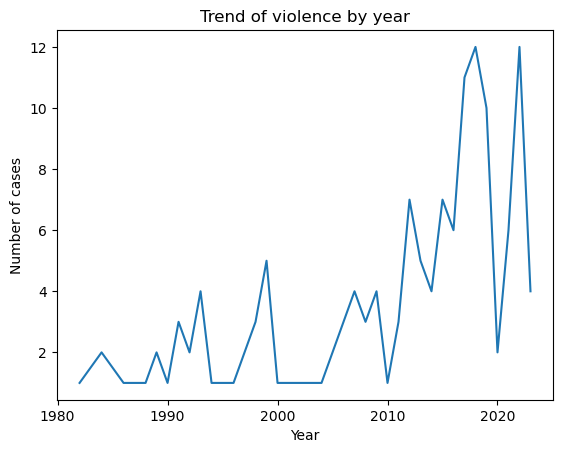

In [36]:
sns.lineplot(data=df_, x=year_df["index"], y=year_df["year"])
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.title("Trend of violence by year")
plt.show()

In [37]:
state_df = df_["state"].value_counts().sort_values(ascending=False).to_frame().reset_index()

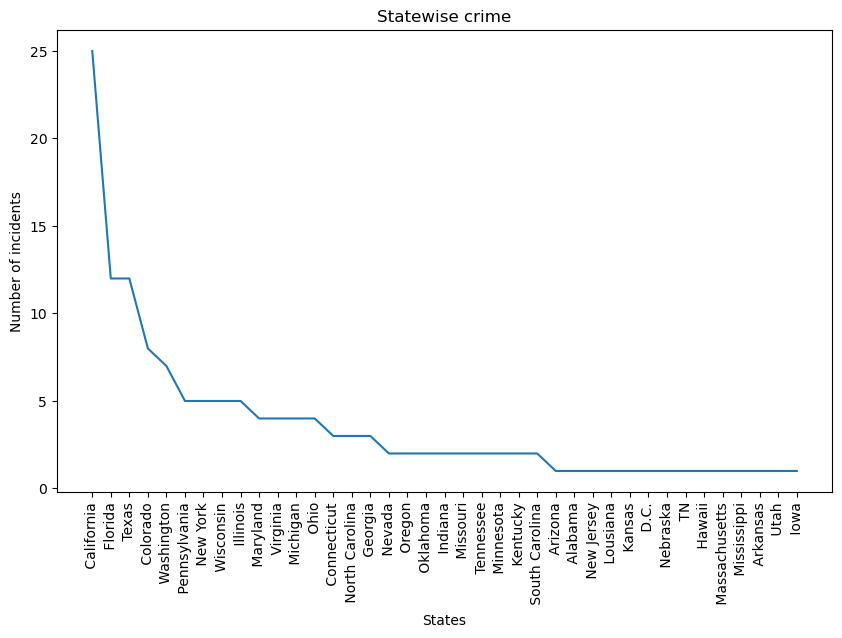

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=state_df, x= state_df["index"], y=state_df["state"])
plt.xlabel("States")
plt.ylabel("Number of incidents")
plt.xticks(rotation=90)
plt.title("Statewise crime")
plt.show()


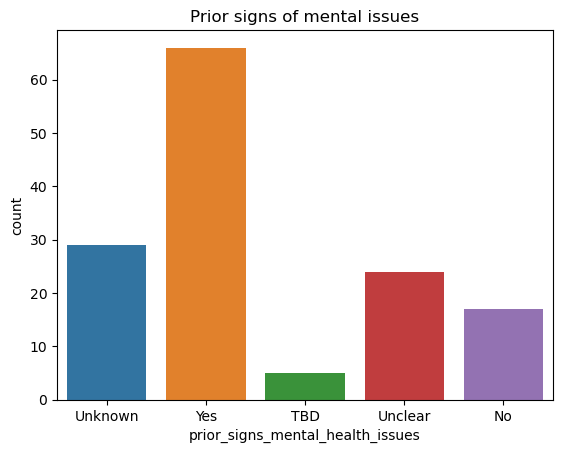

In [39]:
sns.countplot(data=df_, x=df_["prior_signs_mental_health_issues"])
plt.title("Prior signs of mental issues")
plt.show()

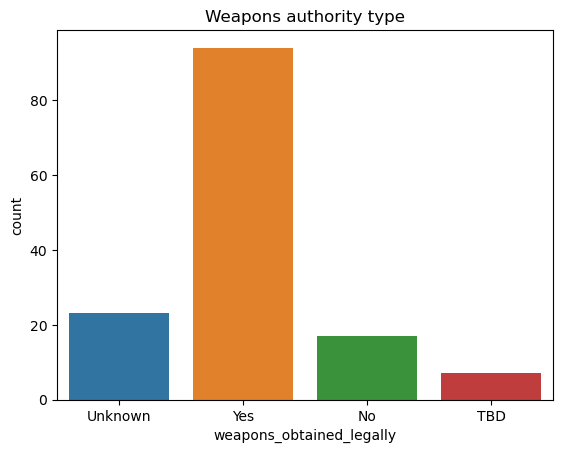

In [40]:
sns.countplot(data=df_, x=df_["weapons_obtained_legally"])
plt.title("Weapons authority type")
plt.show()

In [41]:
total_deaths = df_["fatalities"].sum()

In [42]:
df_["injured"] = pd.to_numeric(df_["injured"], errors="coerce")

In [43]:
total_injured = df_["injured"].sum()

In [44]:
df_["total_victims"] = pd.to_numeric(df_["total_victims"], errors="coerce")

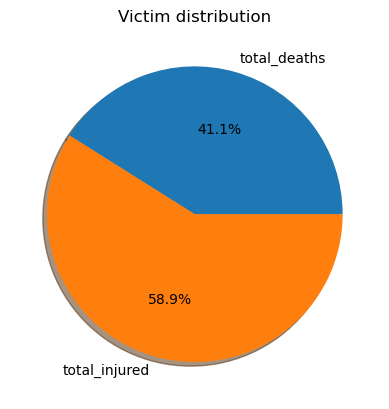

In [45]:
plt.pie([total_deaths,total_injured], labels = ["total_deaths","total_injured"], autopct="%1.1f%%", shadow=True)
plt.title("Victim distribution")
plt.show()

# 4. Understanding Relationships

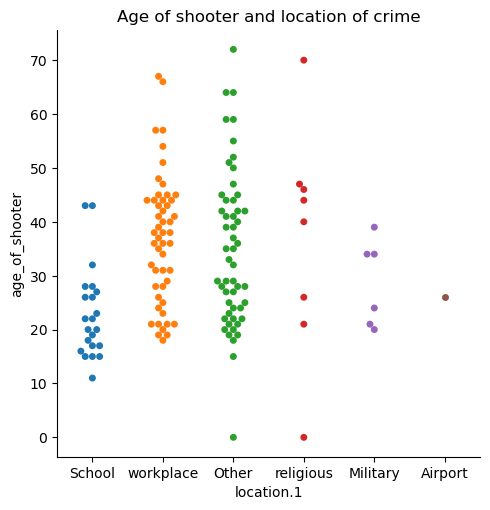

In [46]:
sns.catplot(data=df_, x="location.1", y="age_of_shooter", kind="swarm")
plt.title("Age of shooter and location of crime")
plt.show()

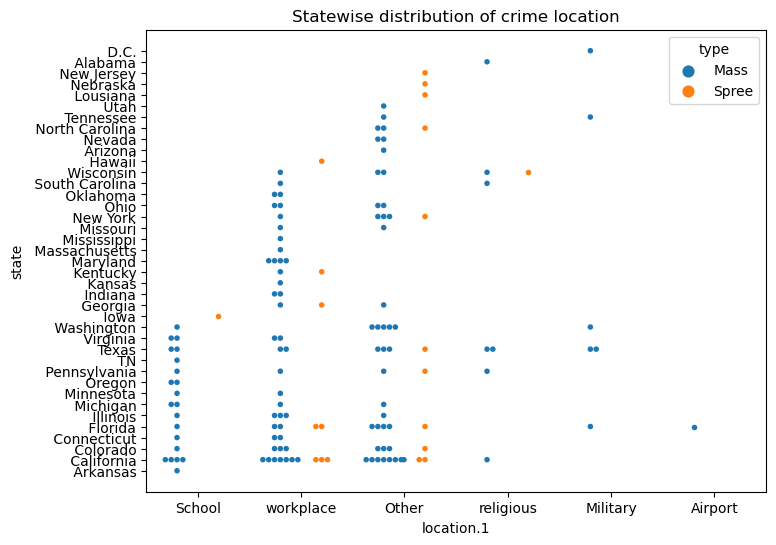

In [47]:
plt.figure(figsize=(8,6))
sns.swarmplot(data=df_,x="location.1", y="state", hue="type", size=4, dodge=True)
plt.title("Statewise distribution of crime location")
plt.show()

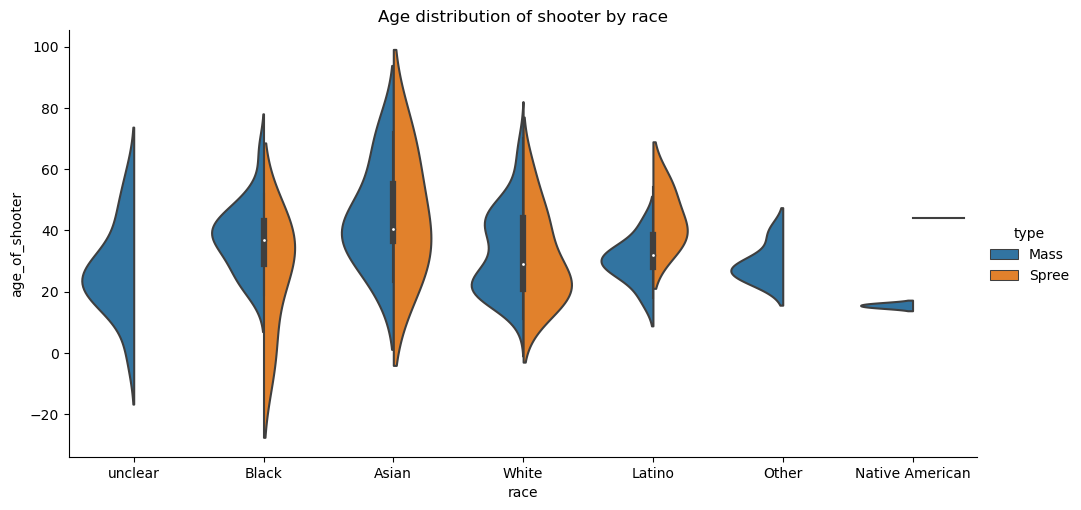

In [48]:
sns.catplot(data=df_, x="race", y="age_of_shooter", kind="violin", hue="type",split=True, height=5, aspect=2)
plt.title("Age distribution of shooter by race")
plt.show()

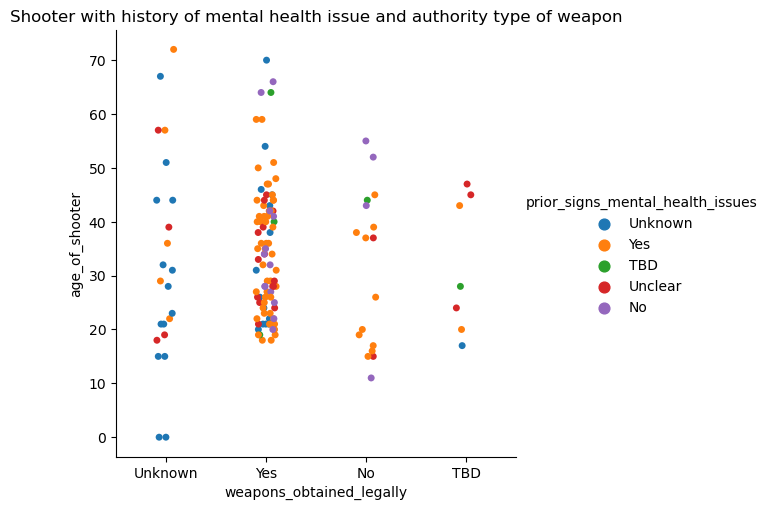

In [49]:
sns.catplot(data=df_, x="weapons_obtained_legally", y="age_of_shooter", hue="prior_signs_mental_health_issues")
plt.title("Shooter with history of mental health issue and authority type of weapon")
plt.show()

# 5. Conclusion

1. **Targeted Locations**: Workplace and schools emerge as the primary targeted areas for incidents of violence.

2. **Demographic Trends**: The majority of individuals involved in these incidents are of white race, followed by black, with males constituting the predominant gender demographic.

3. **Violence Types**: Mass shootings account for over 80% of the incidents, while spree shootings represent a smaller portion of the cases.

4. **Increase in Gun Violence**: There has been a significant increase in gun violence post-2010, with an average of four cases per year, which later peaked at 12 cases.

5. **State-wise Distribution**: California records the highest number of incidents, exceeding 20, followed by Florida and Texas. Each of these states has experienced at least one incident.

6. **Mental Health Links**: A substantial proportion of the perpetrators had previously identified mental health issues.

7. **Legal Authorization of Firearms**: Most of the perpetrators possessed legal authorization for firearms. In light of individuals with prior history of mental health concerns obtaining firearms legally, it prompts the question if guns are in responsible hands

8. **Fatalities and Injuries**: Over one-third of gun violence incidents resulted in fatalities, while more than half of the victims sustained injuries.

9. **Age-Dependent Crime Locations**: The location of the crime appears to correlate with the age of the perpetrators, with individuals around 20 years old often targeting schools and those over 30 predominantly targeting workplaces.



## - By Kartavya Desai